# Historical Daily Data ( Rolls Royce )

In [6]:
import pandas as pd
df = pd.read_csv('/Users/zeinabkahin/Downloads/RR.L.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,236.374207,238.845001,232.873901,233.766098,218.294174,11219725
1,2020-01-03,232.667999,233.628906,229.030396,232.599304,217.204605,12363013
2,2020-01-06,231.295303,233.766098,228.931595,232.324799,216.948273,11385507
3,2020-01-07,234.040695,234.260300,227.657700,229.304901,214.128250,9566792
4,2020-01-08,227.314606,229.579498,225.530106,228.412704,213.295105,11775523


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
502,2021-12-23,118.480003,123.800003,118.320000,120.839996,120.839996,31442443
503,2021-12-24,122.019997,123.239998,120.678001,121.620003,121.620003,5480584
504,2021-12-29,123.919998,125.860001,121.779999,121.879997,121.879997,24630669
505,2021-12-30,122.000000,123.320000,120.879997,123.080002,123.080002,11207784
506,2021-12-31,121.699997,122.879997,121.019997,122.879997,122.879997,5261705


Text(0.5, 1.0, 'Closing Price')

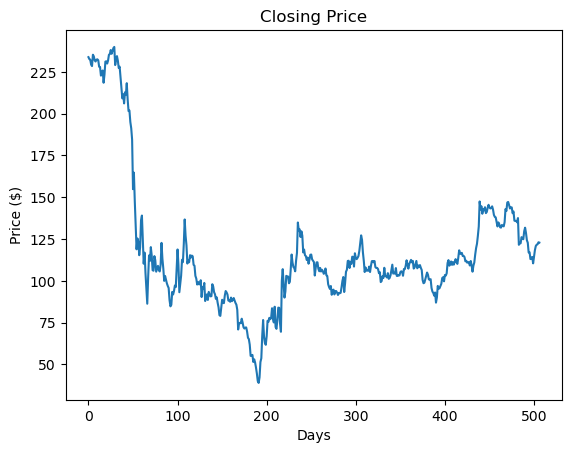

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close']) #choosing the series you want to plot
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closing Price')

# Movement of The Equity Price

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd

In [26]:
data = yf.download("RR.L", start="2020-01-01", end="2022-01-01")

[*********************100%%**********************]  1 of 1 completed


In [33]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,118.480003,123.800003,118.320000,120.839996,120.839996,31442443
2021-12-24,122.019997,123.239998,120.678001,121.620003,121.620003,5480584
2021-12-29,123.919998,125.860001,121.779999,121.879997,121.879997,24630669
2021-12-30,122.000000,123.320000,120.879997,123.080002,123.080002,11207784
2021-12-31,121.699997,122.879997,121.019997,122.879997,122.879997,5261705


In [34]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 507 entries, 2020-01-02 to 2021-12-31
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
507 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


array([<Axes: xlabel='Date'>], dtype=object)

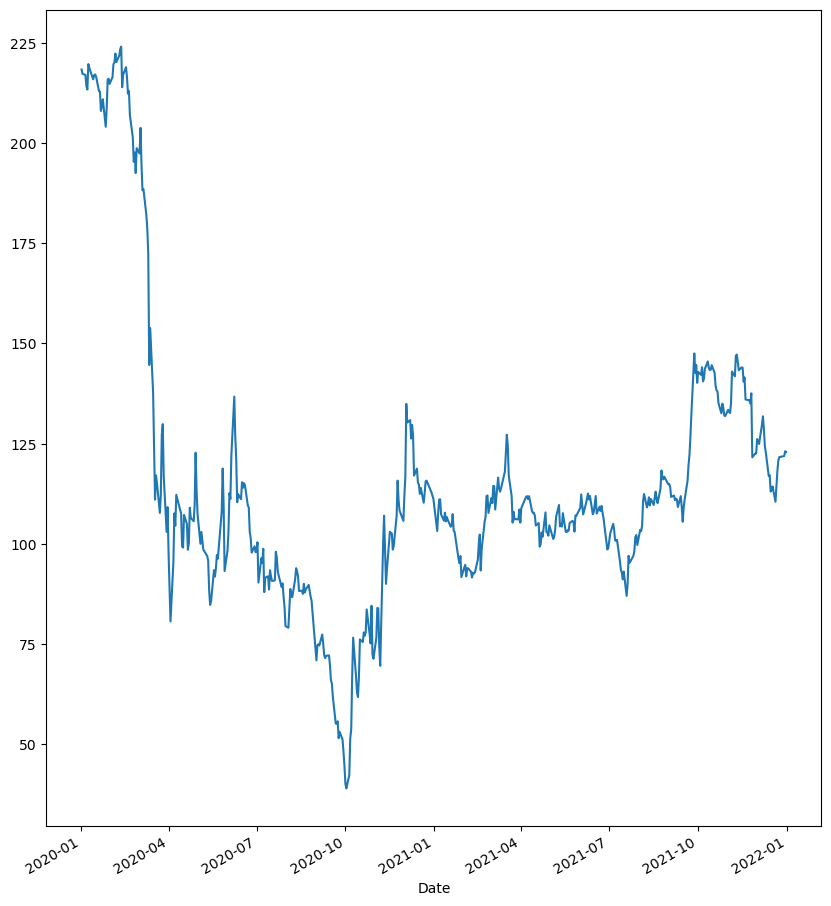

In [35]:
ADJ.plot(figsize=(10, 12), subplots=True)

# Annualised Standard Deviation

In [36]:
ADJ.describe().round(2)

count    507.00
mean     115.56
std       36.57
min       38.98
25%       96.96
50%      108.00
75%      122.16
max      224.00
Name: Adj Close, dtype: float64

# Annualised Normal Return & Volatility 

In [54]:
import pandas as pd
df = pd.read_csv('/Users/zeinabkahin/Downloads/RR.L.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,236.374207,238.845001,232.873901,233.766098,218.294174,11219725
1,2020-01-03,232.667999,233.628906,229.030396,232.599304,217.204605,12363013
2,2020-01-06,231.295303,233.766098,228.931595,232.324799,216.948273,11385507
3,2020-01-07,234.040695,234.260300,227.657700,229.304901,214.128250,9566792
4,2020-01-08,227.314606,229.579498,225.530106,228.412704,213.295105,11775523


In [55]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
502,2021-12-23,118.480003,123.800003,118.320000,120.839996,120.839996,31442443
503,2021-12-24,122.019997,123.239998,120.678001,121.620003,121.620003,5480584
504,2021-12-29,123.919998,125.860001,121.779999,121.879997,121.879997,24630669
505,2021-12-30,122.000000,123.320000,120.879997,123.080002,123.080002,11207784
506,2021-12-31,121.699997,122.879997,121.019997,122.879997,122.879997,5261705


In [58]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.005003785663302975,
 -0.0011808376393408902,
 -0.013083817273843175,
 -0.003898458263593347,
 0.02931358040920908]

In [59]:
#Changing the list variable to numpy array:
normal_return=np.array(normal_return)
#calculating the mean and standard deviation using numpy:
mean_nr = normal_return.mean() * len(normal_return)
sd_nr = normal_return.std() * (len(normal_return) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (mean_nr,sd_nr))

The annulized normal return is 0.05083408 and its annulized volatility is 1.14143135


In [62]:
#Changing the list variable to numpy array:
log_return=np.array(log_return)
#calculating the mean and standard deviation using numpy:
mean_logr = log_return.mean() * len(log_return)
sd_logr = log_return.std() * (len(log_return) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (mean_logr,sd_logr))

The annulized normal return is -0.57463533 and its annulized volatility is 1.10923454


Text(0.5, 1.0, 'Closing Price')

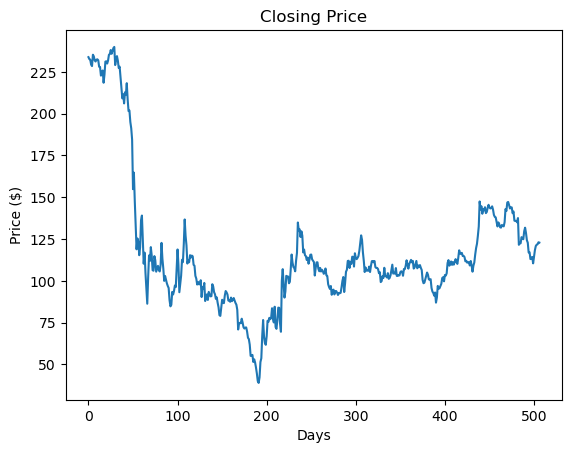

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close']) #choosing the series you want to plot
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closing Price')

Text(0.5, 1.0, 'Log Return')

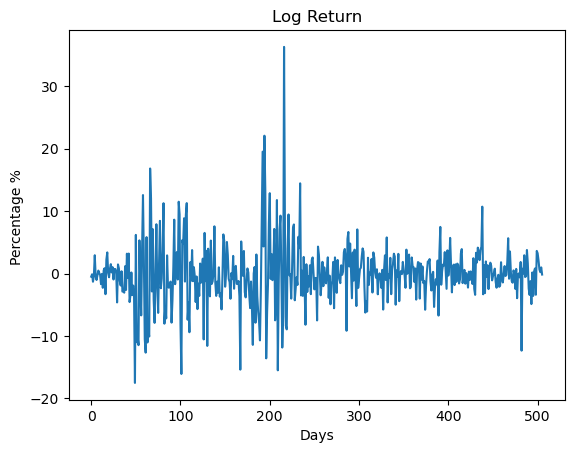

In [64]:
fig = plt.figure()
plt.plot(log_return * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return')

# Binomial Tree Model

In [70]:
import math

def binomial_tree_option_pricing(S, K, T, r, sigma, n, option_type='call'):
    dt = T / n
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)

    # Initialize option values at maturity
    option_values = [0] * (n + 1)
    for i in range(n + 1):
        if option_type == 'call':
            option_values[i] = max(0, S * (u ** (n - i)) * (d ** i) - K)
        elif option_type == 'put':
            option_values[i] = max(0, K - S * (u ** (n - i)) * (d ** i))

    # Calculate option values at each node
    for j in range(n - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = math.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])

    return option_values[0]

# Example usage for a European call option
S0 = 122.88    # Initial stock price
K = 115     # Strike price
T = 1       # Time to maturity (in years)
r = 0.035    # Risk-free rate
sigma = 1.109234 # Volatility
n = 100     # Number of time steps

call_price = binomial_tree_option_pricing(S0, K, T, r, sigma, n, option_type='call')
print(f"European Call Option Price (Binomial Tree): {call_price}")


European Call Option Price (Binomial Tree): 55.38792546924994


# Black-Scholes-Merton Model

In [71]:
from scipy.stats import norm

def black_scholes_option_pricing(S, K, T, r, sigma, option_type='call'):
    d1 = (math.log(S / K) + (r + (sigma**2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

# Example usage for a European call option
S0 = 122.88    # Initial stock price
K = 115     # Strike price
T = 1       # Time to maturity (in years)
r = 0.035    # Risk-free rate
sigma = 1.109234 # Volatility

call_price_bs = black_scholes_option_pricing(S0, K, T, r, sigma, option_type='call')
print(f"European Call Option Price (Black-Scholes): {call_price_bs}")


European Call Option Price (Black-Scholes): 55.325151946204464


# Binomial Tree Model - Graph

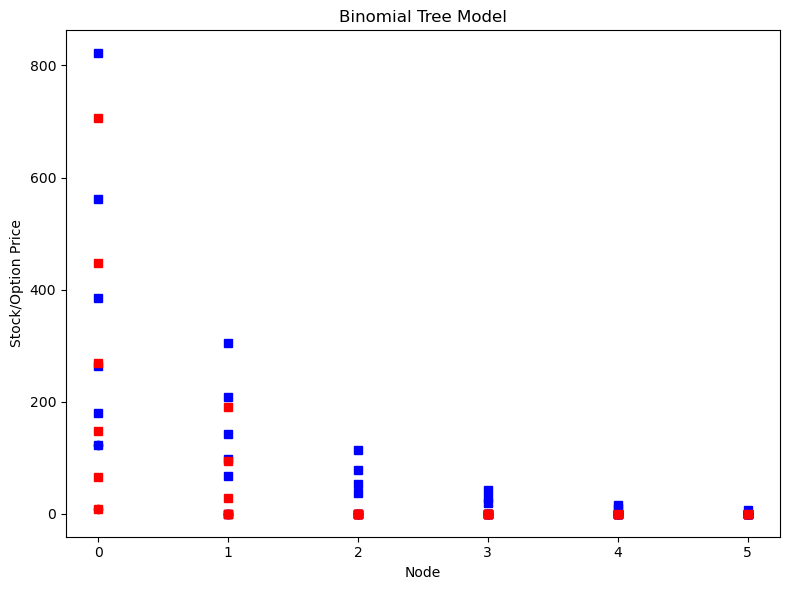

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_tree_model(S, K, T, r, v, n=5):

    # Calculate required parameters  
    dt = T / n
    u = np.exp((r - 0.5 * v**2) * dt + v * np.sqrt(dt)) 
    d = np.exp((r - 0.5 * v**2) * dt - v * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize tree 
    tree = np.zeros((n+1, n+1))
    tree[0,0] = S
    
    # Populate tree nodes
    for col in range(n):
        for row in range(col+1):
            tree[row, col+1] = tree[row, col] * u
            tree[row+1, col+1] = tree[row, col] * d
            
    # Calculate option values    
    call_values = np.maximum(tree - K, 0)  
    
    # Plot tree
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(tree[:,0], linestyle='none', marker='o', color='blue')  
    ax.plot(call_values[:,0], linestyle='none', marker='o', color='red')
    
    for col in range(n+1):
        ax.plot(tree[:,col], linestyle='none', marker='s', color='blue')
        ax.plot(call_values[:,col], linestyle='none', marker='s', 
        color='red')
        
    ax.set_xlabel('Node')
    ax.set_ylabel('Stock/Option Price')
    ax.set_title('Binomial Tree Model')
       
    plt.tight_layout()
    plt.show()
    
S = 122.88  
K = 115  
T = 1  
r = 0.035   
v = 1.109234
n = 5

binomial_tree_model(S, K, T, r, v, n)

# Black-Scholes-Merton Model - Graph

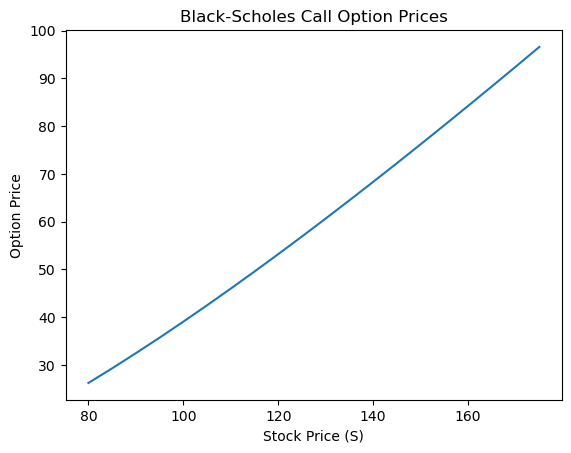

In [77]:
import numpy as np
import matplotlib.pyplot as plt

S = 122.88  
K = 115
T = 1  
r = 0.035
v = 1.109234

def bsm_call_price(S,K):
    d1 = (np.log(S / K) + (r + 0.5 * v**2) * T) / (v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call

s_range = np.arange(80, 180, 5)
prices = [bsm_call_price(x,K) for x in s_range]

fig, ax = plt.subplots()
ax.plot(s_range, prices)
ax.set_xlabel('Stock Price (S)')  
ax.set_ylabel('Option Price')
ax.set_title('Black-Scholes Call Option Prices')
plt.show()

# Greeks - Delta

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta = si.norm.cdf(d1, 0.0, 1.0) - 1
    
    return delta

In [14]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 115, T[i], 0.035, 1.1093, 'call')

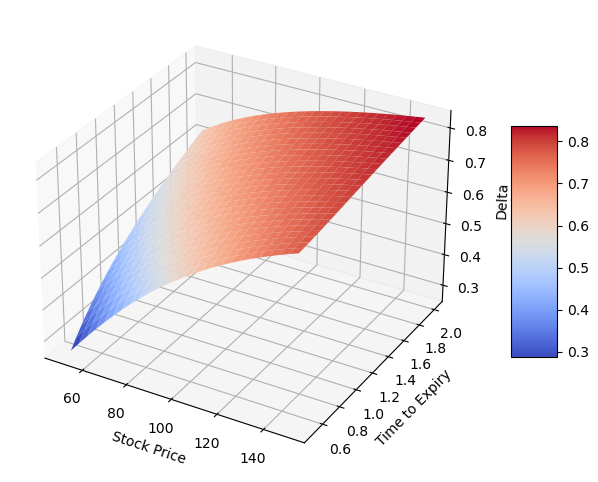

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
#rstride: the array of row stride (step size) cstride: the array of column stride.
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [27]:
d = delta(122.88, 115, 1, 0.035, 1.109234, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.7408 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.7408 .


# Greeks - Gamma

In [19]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    
    return gamma

In [30]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 115, T[i], 0.035, 1.1093, 'call')

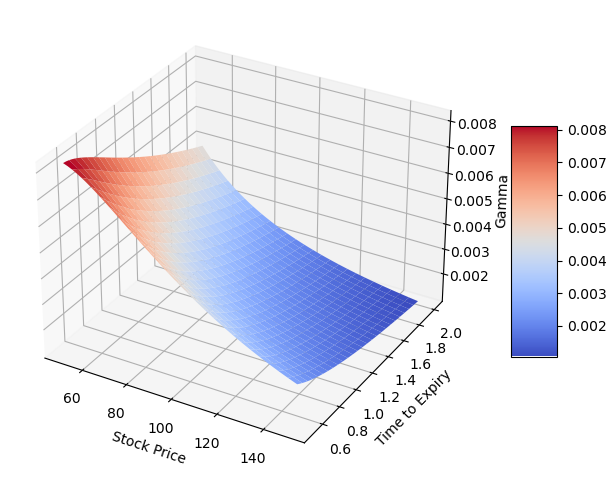

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [33]:
g = gamma(122.88, 115, 1, 0.035, 1.109234, 'call')
print('The value of Gamma is', g.round(4),'.','If the stock price increase 1 dollar, then the value of the option delta will increase $', g.round(4), '.')

The value of Gamma is 0.0024 . If the stock price increase 1 dollar, then the value of the option delta will increase $ 0.0024 .


# Greeks - Theta

In [29]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [34]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 115, T[i], 0.035, 1.1093, 'call')

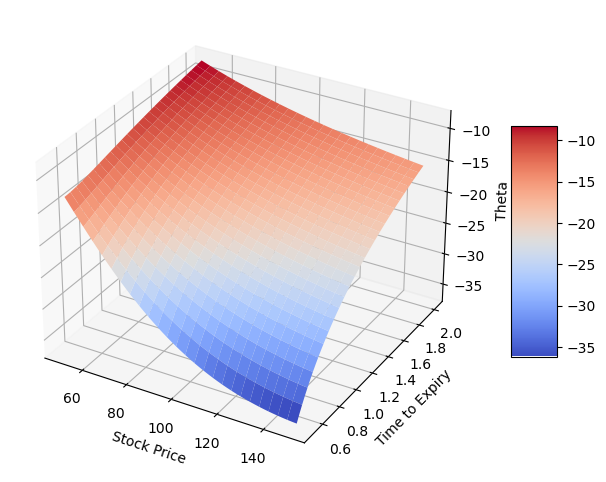

In [35]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [53]:
t = theta(122.88, 115, 1, 0.035, 1.109234, 'call')
print('The value of Theta is', t.round(4),'.','If the time to maturity decreases by 1 day, then the value of the option will decrease $', t.round(4), '.')

The value of Theta is -23.3191 . If the time to maturity decreases by 1 day, then the value of the option will decrease $ -23.3191 .


In [48]:
-23.3191/365 #Days

-0.06388794520547945

# Greeks - Rho

In [49]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [50]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 115, T[i], 0.035, 1.1093, 'call')

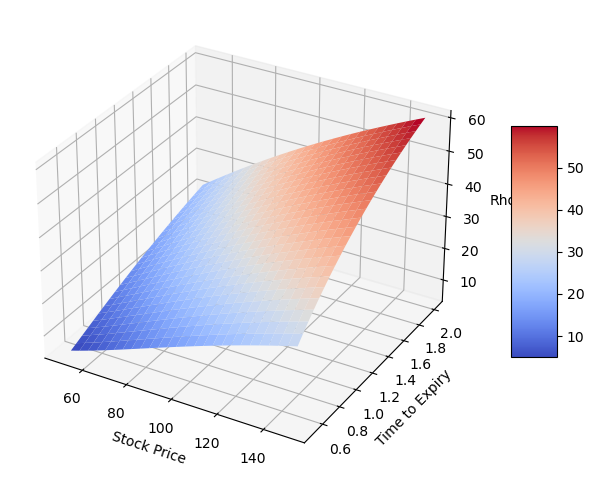

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);


In [52]:
r = rho(122.88, 115, 1, 0.035, 1.109234, 'call')
print('The value of Rho is', r.round(4),'.','If the risk free rate increases by 1%, then the value of the option will decrease $', r.round(4), '.')

The value of Rho is 35.7086 . If the risk free rate increases by 1%, then the value of the option will decrease $ 35.7086 .
